In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
## Reading Dataset
df = pd.read_csv(r'D:\Programming\Study\Machine Learning\Datasets\health_dataset_clusters_with_cholesterol.csv')
df.head()

,Health Score,Cholesterol Level,Condition
0,97.483571,181.788937,Good
1,94.308678,182.803923,Good
2,98.238443,185.415256,Good
3,102.615149,185.269010,Good
4,93.829233,173.111653,Good


In [3]:
df = df.drop('Condition',axis=1)
df.head()

,Health Score,Cholesterol Level
0,97.483571,181.788937
1,94.308678,182.803923
2,98.238443,185.415256
3,102.615149,185.269010
4,93.829233,173.111653


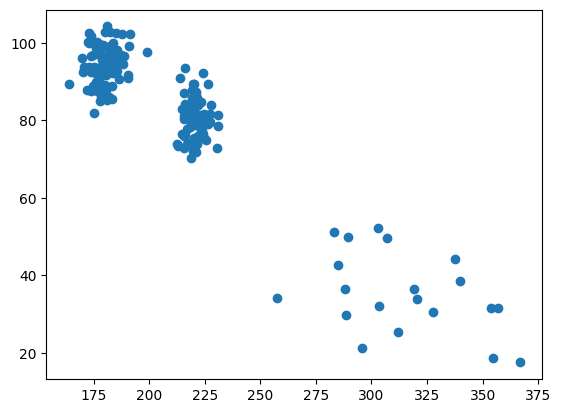

In [4]:
plt.scatter(df['Cholesterol Level'],df['Health Score'])

### Implementing Isolation Forest


In [5]:
from sklearn.ensemble import IsolationForest
# Parameters
# 1.n_estimators: Number of trees in the forest.
#                 More trees improve accuracy but increase computation time.
# 2.max_samples:  Number of data points used to train each tree.
#                 Lower values can improve performance on large datasets.
# 3.contamination:Proportion of anomalies in the data (used for decision thresholds).
#                 Helps scale the anomaly scores to better classify points.
# 4.max_features: Number of features to consider for each split.

isolation_forest_model = IsolationForest(n_estimators=100,max_samples='auto',contamination=0.1,n_jobs=-1)
isolation_forest_model.fit(df)
prediction = isolation_forest_model.predict(df)

In [6]:
## Finding Index of outliers
index = np.where(prediction<0)
print(index)

(array([ 62,  74, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 193, 194, 196, 197, 198, 199]),)


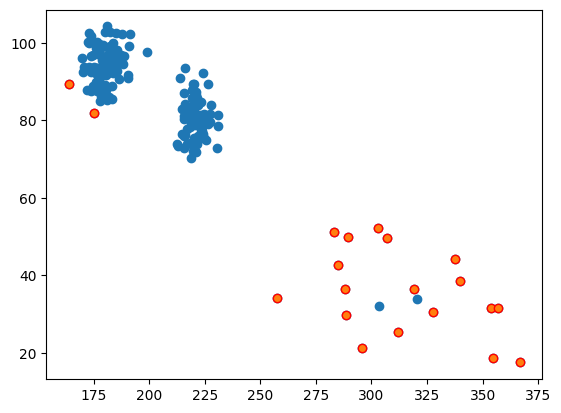

In [7]:
x = df.values
plt.scatter(df.iloc[:,1],df.iloc[:,0])
plt.scatter(x=x[index,1],y=x[index,0],edgecolors='r')

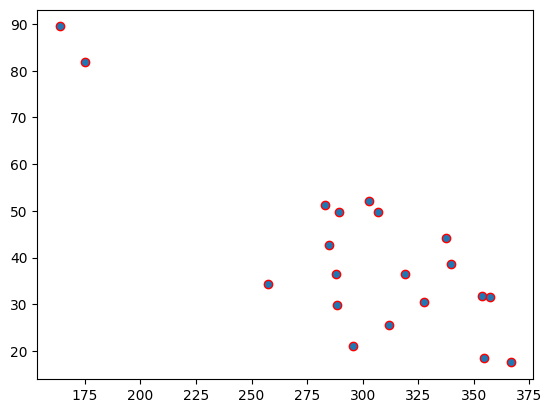

In [8]:
plt.scatter(x=x[index,1],y=x[index,0],edgecolors='r')

In [9]:
######## Code for creating Dataset
# import pandas as pd
# import numpy as np

# # Set random seed for reproducibility
# np.random.seed(42)

# # Create high-density regions (clusters) for Health Score
# cluster_1 = np.random.normal(loc=95, scale=5, size=100)
# cluster_2 = np.random.normal(loc=80, scale=5, size=80)

# # Create outliers for Health Score
# outliers_1 = np.random.normal(loc=45, scale=10, size=10)
# outliers_2 = np.random.normal(loc=30, scale=10, size=10)

# # Combine clusters and outliers for Health Score
# health_scores = np.concatenate([cluster_1, cluster_2, outliers_1,outliers_2])

# # Create high-density regions (clusters) for Cholesterol Level
# cholesterol_cluster_1 = np.random.normal(loc=180, scale=5, size=100)
# cholesterol_cluster_2 = np.random.normal(loc=220, scale=5, size=80)

# # Create outliers for Cholesterol Level
# cholesterol_outliers_1 = np.random.normal(loc=300, scale=20, size=10)
# cholesterol_outliers_2 = np.random.normal(loc=330, scale=20, size=10)

# # Combine clusters and outliers for Cholesterol Level
# cholesterol_levels = np.concatenate([cholesterol_cluster_1, cholesterol_cluster_2, cholesterol_outliers_1,cholesterol_outliers_2])

# # Create conditions (most are good)
# conditions = ['Good'] * 180 + ['Disease'] * 20


# # Create the dataset
# data = {
#     "Health Score": health_scores,
#     "Cholesterol Level": cholesterol_levels,
#     "Condition": conditions
# }

# # Create a DataFrame
# df = pd.DataFrame(data)

# # Export to CSV
# df.to_csv("health_dataset_clusters_with_cholesterol.csv", index=False)

# print(df.head(20))  # Display the first 20 rows
